<a href="https://colab.research.google.com/github/ilhamydn17/PCVK_Ganjil_2023/blob/jobsheet-week-12/Jobsheet_PCVK_Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PCVK WEEK-11
# Face Detection

In [90]:
# path to folder image
path = "drive/MyDrive/Kuliah/PCVK/"

In [91]:
# import library
import cv2 as cv
from google.colab.patches import cv2_imshow as show
from matplotlib import pyplot as plt

### 1. Face Detection Image


In [92]:
def showImg(image):
  # memisahkan saluran warna (blue, green, red) karena matplotlib menggunakan skema warna RGB
  b,g,r  = cv.split(image)
  rgb_image = cv.merge([r,g,b])

  # menampilkan gambar dalam ukuran tertentu
  plt.figure(figsize=(4,6))
  plt.imshow(rgb_image)
  plt.title('Result')
  plt.show()

In [93]:
def faceDet(image, ng):
  # load face detection model
  face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
  imgOrJk = cv.imread(path + 'images/facedet/' + image)
  # load image
  imgJk = cv.imread(path + 'images/facedet/' + image)
  gray = cv.cvtColor(imgJk, cv.COLOR_BGR2GRAY)

  # perform face detection
  faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=ng, minSize=(20,20))
  # draw rectangle around detected faces
  for(x,y,w,h) in faces:
    cv.rectangle(imgJk, (x,y), (x+w, y+h), (0,255,0), 2)

  showImg(imgJk)

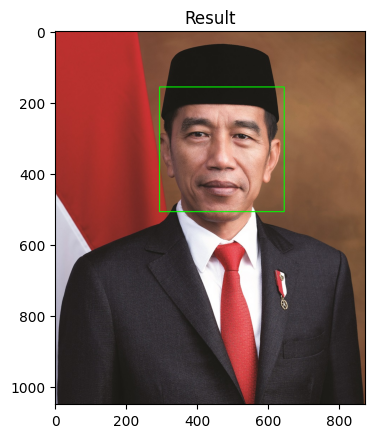

In [94]:
faceDet('jokowi.jpg', 18)

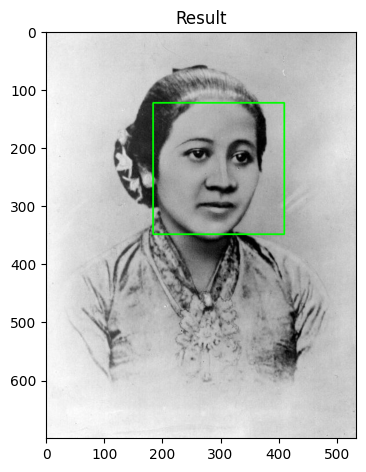

In [95]:
faceDet('kartini.jpg', 18)

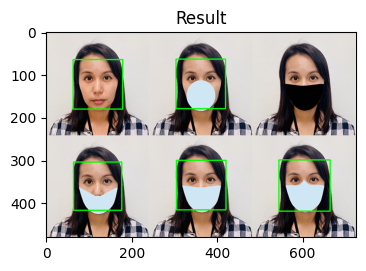

In [96]:
faceDet('mask.png', 18)

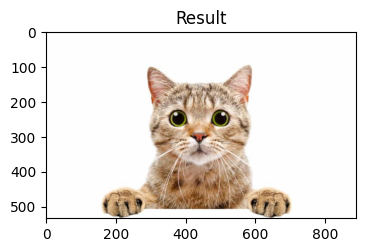

In [97]:
faceDet('kucing.jpg', 18)

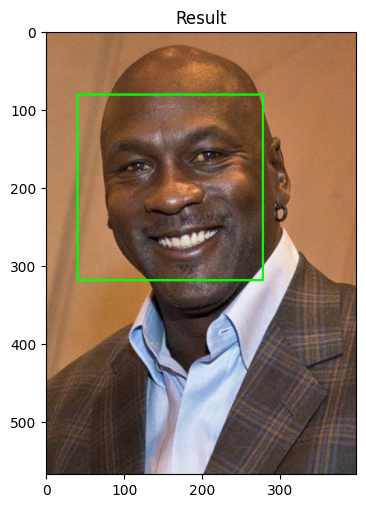

In [98]:
faceDet('mjordan.jpg', 18)

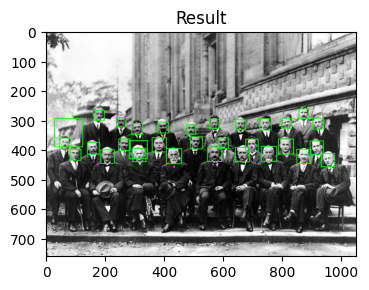

In [99]:
faceDet('solvayconf.jpg', 3)

### 2. Cat Face Detection

<Figure size 1000x1000 with 0 Axes>

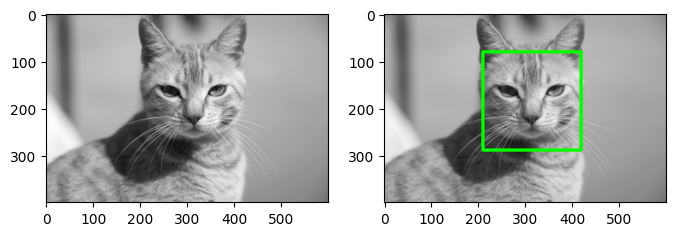

In [100]:
cascade_kucing = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalcatface.xml')

mycat = cv.imread(path + 'images/facedet/mycat.jpg', 0)

mycat1 = cv.cvtColor(mycat, cv.COLOR_GRAY2RGB)

roi_wajah = cascade_kucing.detectMultiScale(mycat)

for(x, y, w, h) in roi_wajah:
  cv.rectangle(mycat1, (x, y), (x+w, y+h), (0, 255, 0), 6)

plt.figure(figsize = (10, 10))
f, axarr = plt.subplots(1, 2, figsize = (8, 8))
plt.subplot(121), plt.imshow(mycat, cmap = 'gray')
plt.subplot(122), plt.imshow(mycat1)
plt.show()

### 3. Eyes Detection

In [101]:
# load face detection model
eye_casc = cv.CascadeClassifier(path + 'images/haarcascades/haarcascade_eye.xml')

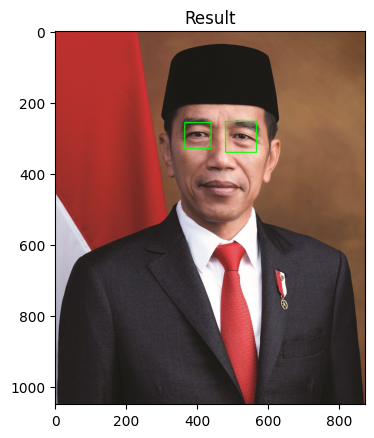

In [102]:
# load image
imgJk = cv.imread(path + 'images/facedet/jokowi.jpg')
gray = cv.cvtColor(imgJk, cv.COLOR_BGR2GRAY)

# perform face detection
eyes = eye_casc.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(20,20))
# draw rectangle around detected faces
for(x,y,w,h) in eyes:
  cv.rectangle(imgJk, (x,y), (x+w, y+h), (0,255,0), 2)

showImg(imgJk)

### 4. Face Tracking dengan Google Colab
Access Webcam for Images and Videos

In [103]:
# import library
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import numpy as np
import PIL
import io
import html
import time

In [117]:
# function to convert javascript object into opencv image
def js_to_image(js_reply):
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  #convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into opencv BGR image
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

In [106]:
# function to convert opencv rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [111]:
# init the haar cascade face detection model
face_cascade = cv.CascadeClassifier(cv.samples.findFile(cv.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [112]:
# webcam images
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript(
      '''
      async function takePhoto(quality){
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);
      }

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // resize the output to fit the video element
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // wait for capture to be clicked
      await new Promise((resolve)=> capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();

      return canvas.toDataURL('image/jpeg', quality);


      '''
  )

  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv.imwrite(filename, img)

  return filename

In [113]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

ReferenceError: takePhoto is not defined


In [114]:
## webcam videos
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [120]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

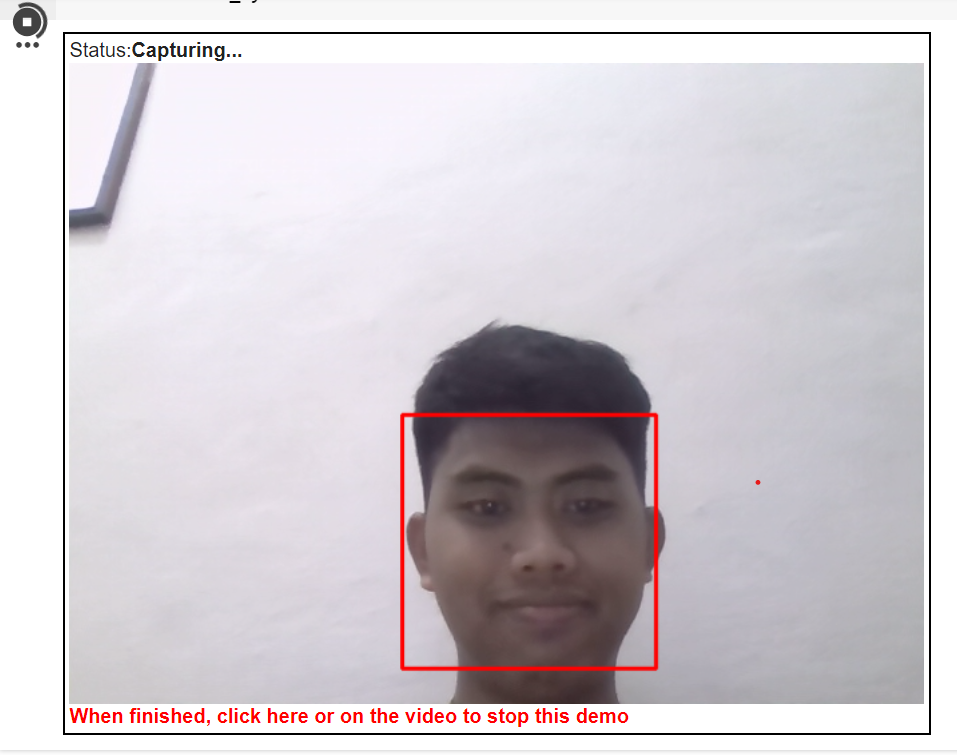

In [121]:
# Hasil run WEBCAM
res = cv.imread('hasil-web-cam-python.png')
show(res)

### 5. Blurring pada wajah yang terdeteksi

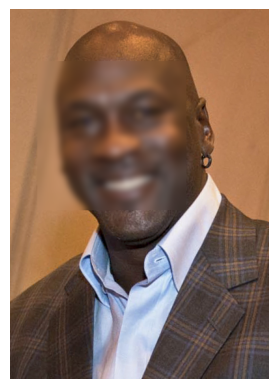

In [122]:
def blur_det(image_path):
    # Load pre-trained face detection model
    face_cascade = cv.CascadeClassifier(path + 'images/haarcascades/haarcascade_frontalface_alt.xml')

    # Load the image
    image = cv.imread(image_path)

    # Convert the image to grayscale
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Blur faces
    for (x, y, w, h) in faces:
        face = image[y:y+h, x:x+w]
        face = cv.GaussianBlur(face, (99, 99), 5)  # Adjust the kernel size for stronger or weaker blurring
        image[y:y+face.shape[0], x:x+face.shape[1]] = face

    # Display the result
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

image_path = path + 'images/facedet/mjordan.jpg'
blur_det(image_path)

### 7. Segmentasi Karakter pada KTP

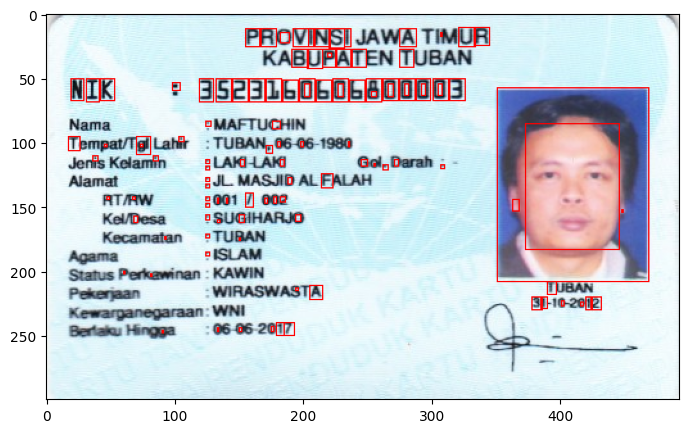

In [132]:
# load image
ktp = cv.imread(path + 'week-07/ktp4.png')

blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv.cvtColor(ktp, cv.COLOR_BGR2RGB))

### 8. Cropping pada bagian NIK KTP

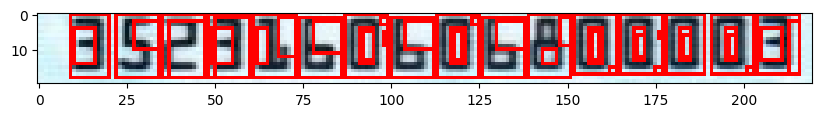

In [133]:
# menggunakan gambar KTP sebelumnya

blurred = cv.GaussianBlur(ktp, (5, 5), 0.8)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

cropped_img = ktp[50:70, 110:330]

plt.figure(figsize=(10,5))
plt.imshow(cv.cvtColor(cropped_img, cv.COLOR_BGR2RGB))

### 9. Menyiapkan dataset untuk training

In [134]:
# import library yang dibutuhkan
import os
import cv2
import numpy as np
import pickle
import tensorflow as tf
from keras.utils import to_categorical
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam

In [135]:
# Load dataset MNIST
(X_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

# Jumlah data yang ingin diambil dari setiap kategori
num_samples_per_class = 100

# List digit yang akan diambil (0 sampai 9)
digits_to_extract = list(range(10))

# Fungsi untuk mengambil sampel dari setiap kategori
def extract_samples(X, y, digits, num_samples):
    samples = []
    for digit in digits:
        digit_indices = np.where(y == digit)[0]
        selected_indices = np.random.choice(digit_indices, num_samples, replace=False)
        samples.extend([(X[i], digit) for i in selected_indices])
    return samples

# Ambil sampel dari setiap kategori
training_data = extract_samples(X_train, y_train, digits_to_extract, num_samples_per_class)

11490434/11490434 [==============================] - 1s 0us/step


In [136]:
# Acak urutan data
np.random.shuffle(training_data)

# Pisahkan fitur dan label
X, Y = zip(*training_data)

# Konversi menjadi numpy array
X = np.array(X).reshape(-1, 28, 28, 1)

# Tulis ke file pickle
pickle_out = open("X_mnist.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y_mnist.pickle", "wb")
pickle.dump(to_categorical(Y, num_classes=10), pickle_out)
pickle_out.close()

### 10. Melakukan training data

In [137]:
# Load file pickle
pickle_in = open("X_mnist.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("Y_mnist.pickle", "rb")
Y = pickle.load(pickle_in)

width, height = 28, 28  # Sesuaikan dengan ukuran gambar MNIST

# Input layer
inputs = Input(shape=(width, height, 1))
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5, 5), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
flaten = Flatten()(conv_layer)
fc_layer = Dense(256, activation='relu')(flaten)
fc_layer = Dense(64, activation='relu')(fc_layer)

# Output layer
outputs = Dense(10, activation='softmax')(fc_layer)

adam = Adam(learning_rate=0.0001)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, Y, epochs=20, verbose=1)
model.save('anpr.model')

Epoch 1/20
32/32 [==============================] - 3s 34ms/step - loss: 3.2566 - accuracy: 0.2510
Epoch 2/20
32/32 [==============================] - 1s 30ms/step - loss: 1.4081 - accuracy: 0.5470
Epoch 3/20
32/32 [==============================] - 1s 28ms/step - loss: 0.8288 - accuracy: 0.7340
Epoch 4/20
32/32 [==============================] - 1s 28ms/step - loss: 0.5640 - accuracy: 0.8230
Epoch 5/20
32/32 [==============================] - 1s 34ms/step - loss: 0.4191 - accuracy: 0.8610
Epoch 6/20
32/32 [==============================] - 1s 45ms/step - loss: 0.3068 - accuracy: 0.9080
Epoch 7/20
32/32 [==============================] - 2s 47ms/step - loss: 0.2340 - accuracy: 0.9310
Epoch 8/20
32/32 [==============================] - 1s 47ms/step - loss: 0.1921 - accuracy: 0.9460
Epoch 9/20
32/32 [==============================] - 1s 46ms/step - loss: 0.1391 - accuracy: 0.9640
Epoch 10/20
32/32 [==============================] - 1s 39ms/step - loss: 0.0975 - accuracy: 0.9780
Epoch 11/

### 11. Melakukan testing model

In [138]:
# import library
import os
import cv2
import numpy as np
import pickle
import tensorflow as tf
from keras.utils import to_categorical

In [139]:
# Load dataset MNIST yang sudah disiapkan sebelumnya
pickle_in = open("X_mnist.pickle", "rb")
X_test = pickle.load(pickle_in)
pickle_in = open("Y_mnist.pickle", "rb")
Y_test = pickle.load(pickle_in)

# Normalisasi data testing
X_test = X_test / 255.0

# Load model yang sudah di-training sebelumnya
model = tf.keras.models.load_model("anpr.model")

# Lakukan prediksi pada data testing
predictions = model.predict(X_test)

32/32 [==============================] - 1s 15ms/step


32/32 [==============================] - 1s 15ms/step - loss: 2.2534 - accuracy: 0.9980
Accuracy on the test set: 99.80%


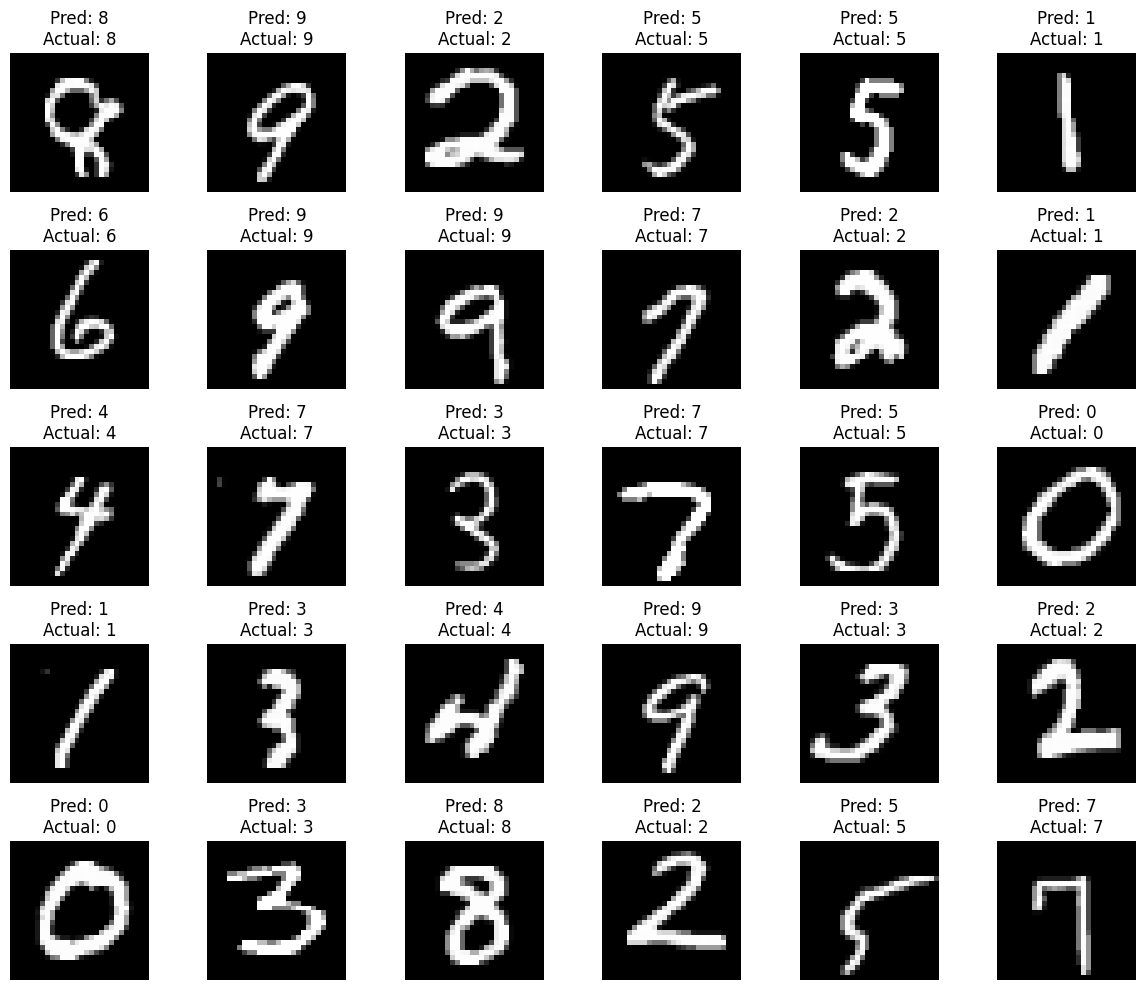

In [140]:
# Evaluasi performa model
accuracy = model.evaluate(X_test, Y_test)[1]
print("Accuracy on the test set: {:.2f}%".format(accuracy * 100))

import matplotlib.pyplot as plt

# Tampilkan 30 hasil uji dengan gambarnya
num_results_to_display = 30
fig, axes = plt.subplots(5, 6, figsize=(12, 10))

for i in range(num_results_to_display):
    predicted_label = np.argmax(predictions[i])
    actual_label = np.argmax(Y_test[i])

    # Ambil gambar dari data testing
    img = X_test[i].reshape((28, 28))  # Assuming the images are 100x100 pixels

    # Tampilkan gambar dan label
    axes[i // 6, i % 6].imshow(img, cmap='gray')
    axes[i // 6, i % 6].set_title(f'Pred: {predicted_label}\nActual: {actual_label}')
    axes[i // 6, i % 6].axis('off')

plt.tight_layout()
plt.show()

### Tugas Praktikum

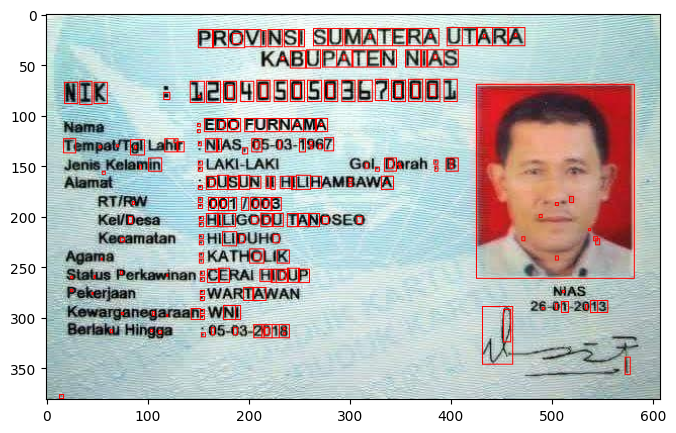

In [142]:
# Load the input image
ktp = cv2.imread(path + 'week-07/ktp5.png')

blurred = cv2.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

cropped_img = ktp[60:90, 140:410]

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))

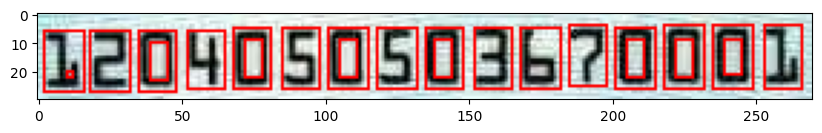

In [143]:
plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))

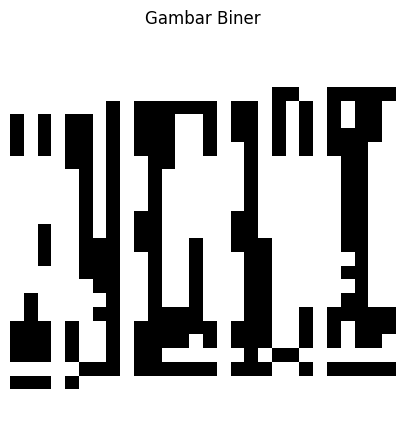

In [144]:
# Assuming cropped_img is your cropped KTP image
cropped_img_resized = cv.resize(cropped_img, (28, 28))

# Convert the resized image to grayscale
cropped_img_gray = cv.cvtColor(cropped_img_resized, cv.COLOR_BGR2GRAY)

# Apply binary thresholding
_, cropped_img_binary = cv.threshold(cropped_img_gray, 128, 255, cv2.THRESH_BINARY)

# Display the binary image
plt.figure(figsize=(10, 5))
plt.imshow(cropped_img_binary, cmap='gray')
plt.title('Gambar Biner')
plt.axis('off')
plt.show()